In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<h1>LOAD IMAGE </h1>

In [3]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

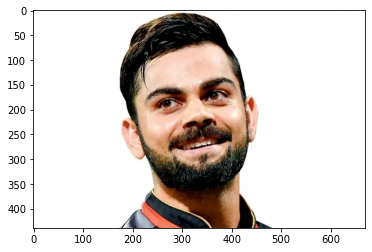

In [57]:
filename="kohli.jpeg"
img=read_file(filename)

org_img = np.copy(img)

<h1> Create Edge Mask</h1>

In [58]:
def edge_mask(img,line_size,blur_value):
    """
    INPUT: Input image
    OUTPUT: edges of images
    """
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    
    edges=cv2.adaptiveThreshold(gray_blur,255,
                                cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    
    return edges

In [67]:
#blur_value is number of borders
# line size === line thickness
line_size,blur_value=11,9
edges=edge_mask(img,line_size,blur_value)

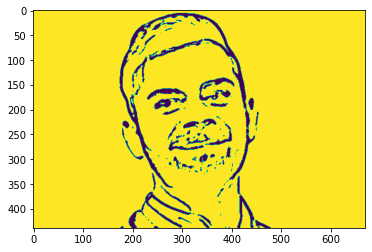

In [68]:
plt.imshow(edges)
plt.show()

<h1>Reduce The Color Palatte</h1>

In [69]:
def color_quantization(img,k):
    
    #Transform the Image
    data = np.float32(img).reshape((-1,3))
    
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #Implementing K-Means Clustering
    ret,label,center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    result = center[label.flatten()]
    result=result.reshape(img.shape)
    
    return result

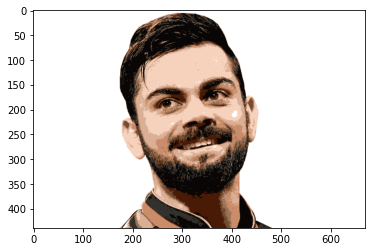

In [78]:
img_quantiz=color_quantization(img,k=9)
plt.imshow(img_quantiz)
plt.show()

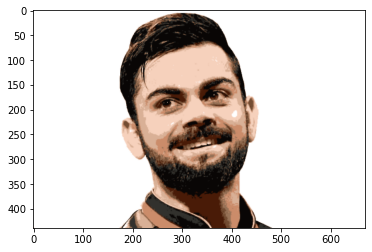

In [79]:
#REDUCE THE NOISE

blurred = cv2.bilateralFilter(img_quantiz,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

<h1>Combine Edge Mask With Quantized Color</h1>

In [80]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    
    plt.imshow(c)
    plt.title("Cartoon")
    plt.show()
    
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()


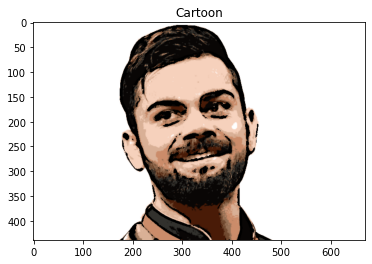

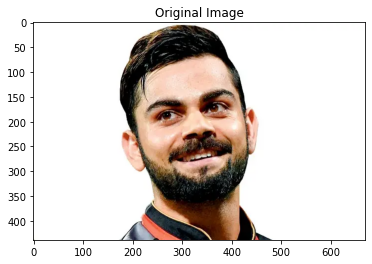

In [81]:
cartoon()